# Comparing Each Decade's Number One Singles: Data Exploration
## Background

From the _List of Billboard number-one singles_ Wikipedia [page](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles): 
>The following year-by-year, week-by-week listings are based on statistics accrued by Billboard magazine before and after the inception of its Hot 100 popularity chart in August 1958.
All data is pooled from record purchases and radio/jukebox play within the United States. Later charts also include digital single sales, online streaming, and YouTube hits.

### How Does a song become number one?
From Spliter in 2015: 
1. __The song has to be good (and accessible):__ 
<blockquote>
The first step to snagging a number one song is, well, writing and producing a really good song...Making a "good" number one song is not necessarily the same as making a "good" song in general. It's not about artistry (though sometimes artistry does hit number one). It's about popularity. And not long-term popularity. But popularity right here, right now.
</blockquote>  

2. __Every week counts independently__:
<blockquote>  
<p>The Billboard Hot 100 chart is calculated on a weekly basis. For a long time, the Billboard charts counted from Monday to Sunday as a standard week. But starting in July 2015, when new music began to standardly come out on Fridays, Billboard has been tracking a single week from Friday to Thursday. At the end of the week, your numbers reset. (And we find out what the number one song is every Tuesday. Are you keeping up?) So there's a huge benefit to releasing song or album on the standard release day (Friday); it helps to take advantage of the way the system counts sales. Release day matters a lot, for the Hot 200 albums chart as well, not just for singles.</p>
    
    <p>To be clear, this doesn't mean that your only chance to have a number one single is immediately after it comes out. Some songs peak much later. We call those "sleeper hits"—songs like Iggy Azalea's "Fancy," for example. A song can peak because of a really great music video, or its inclusion in something else popular (like a movie trailer). For example, N.W.A. finally snagged their first top 40 hit in the wake of the release of the movie Straight Outta Compton almost 30 years after its release.</p>

    But every week on Friday, the counter clocks reset, and a song has to prove itself the best in the country all over again.
</blockquote>

3. __The first factor in number one calculations: sales__:
<blockquote>  
<p>The number of albums sold is determined by Nielsen Soundscan, a service that monitors how many albums an artist sells both digitally and physically. According to Nielsen's site, the organization compiles data from more than 39,000 retail outlets globally every week, and then reports the findings to Billboard to use in a specially concocted ratio to pick the Top 100.</p>
    
    <p>In the calculations for number one, sales only play a small role. According to Billboard, sales make up somewhere between 35-45% of the ratio that determines how well a song does on the charts. But if a single has massive sale numbers, that alone could bump it into the Top 40.</p>
    
    <p>In February 2005, Billboard began to include digital sales of albums from digital retailers like iTunes and Rhapsody. In 2007, the system evolved to include streaming songs from platforms like Yahoo Music and AOL Music. Since then, the charts have been brought up to date by including platforms like Spotify and Apple Music, in addition to views from YouTube—with one video play counting as a song play. Ultimately, though, streaming only makes up a small fraction (20-30%) of the formula used to determine the ranking of songs in America.</p>
</blockquote>

4. __What matters more than streaming? Radio__:
<blockquote>  
<p>It's tempting to discount radio as something that only olds listen to. Who doesn't just make Spotify playlists or listen to the "radio" on Pandora—one that's specifically curated for them? Turns out, almost everyone. Radio has, for decades, been the most stable part of the music industry in terms of maintaining listeners.</p>
    
    <p>According to a 2013 Pew Research Center report on audio listening in the US, almost 92% of the listening public listens to AM/FM radio. That percentage hasn't changed much over the last 10 years, even with the advent of the internet. The biggest AM/FM radio company in America, iHeart Radio, says people tune in to the radio eight times per day. According to the Pew Research Center, people spend more time listening to the radio than they do surfing the internet. And radio plays take care of the rest of the counting ratio with 30-40%.</p>
    
Getting into the Top 40 might take luck, but getting the number one song in America takes more than that—it takes a precise confluence of every form of viral behavior all at once. People have to buy the song, they have to hear it on the radio and watch the video on YouTube. It has to, simply, be a hit.
</blockquote>





[Source](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles)   



## Goals
Explore the data, answer preliminary questions.

### Preliminary Questions

1. Of all songs that went number one since 1950, are there any commonalities between the songs? Like tempo, valence, etc. ?
2. Is there any cyclical patterns? For example, popular songs today sound very disco-like from the 70s and very synth-like from the 80s. 

3. Are genres consistent among number ones? Do all songs have similar genres?
4. Are songs that go number one sung more by women or men? Solo acts or ensembles/groups?

These questions are just a starting point to guide this analysis. I'll describe further questions as I go.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

songs = pd.read_csv("../data/processed/final_dataset_year.csv", index_col=0)
songs.shape

(1188, 20)

A question that came to mind was which decade had the most number one hits?

### Which decade had the most number one hits?

In [2]:
songs['decade'].value_counts()

1970    253
1980    231
1960    203
1990    140
2000    129
2010    116
1950    116
Name: decade, dtype: int64

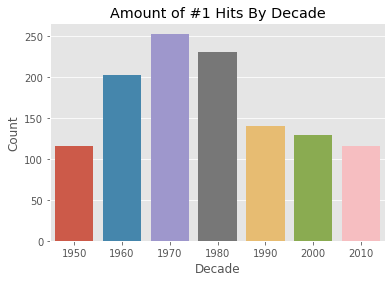

In [3]:
sns.countplot(x = 'decade', data=songs)

plt.xlabel('Decade')
plt.ylabel('Count')
plt.title("Amount of #1 Hits By Decade")
plt.show()

It looks like the 1970s had the most number one hits, but the 80s and the 60s are not too far behind. Interestingly, the most recent decade, the 2010s, has the least number one hits, tied with th 1950s.

From the histogram, we see that the amount of number one's per decade actually decrease after the 80s.

### NME: The number of unique Number One singles is decreasing.
<blockquote>In the ‘70s, the average number of Number Ones could be as high as 30 per year.In the past four years we haven’t had more than 13 unique Number Ones per year. As BBC Radio 1 boss Chris Price explained to NME last year, the stagnancy of the chart is probably down to streaming being counted in the charts:
    
“We’ve moved away from somebody walking into HMV and being a physical single, or downloading a 99p download from iTunes, and we’re moving much more towards measuring engagement over time. It’s less like somebody walking into a shop and making a purchase, and more like somebody sitting at home in their bedroom and listening to something several times over.”

[Source](https://www.nme.com/blogs/nme-blogs/billboard-100-shorter-explicit-2054269)  
</blockquote>

I'm curious to see if we can pinpoint a specific year for this drop in number one hits.

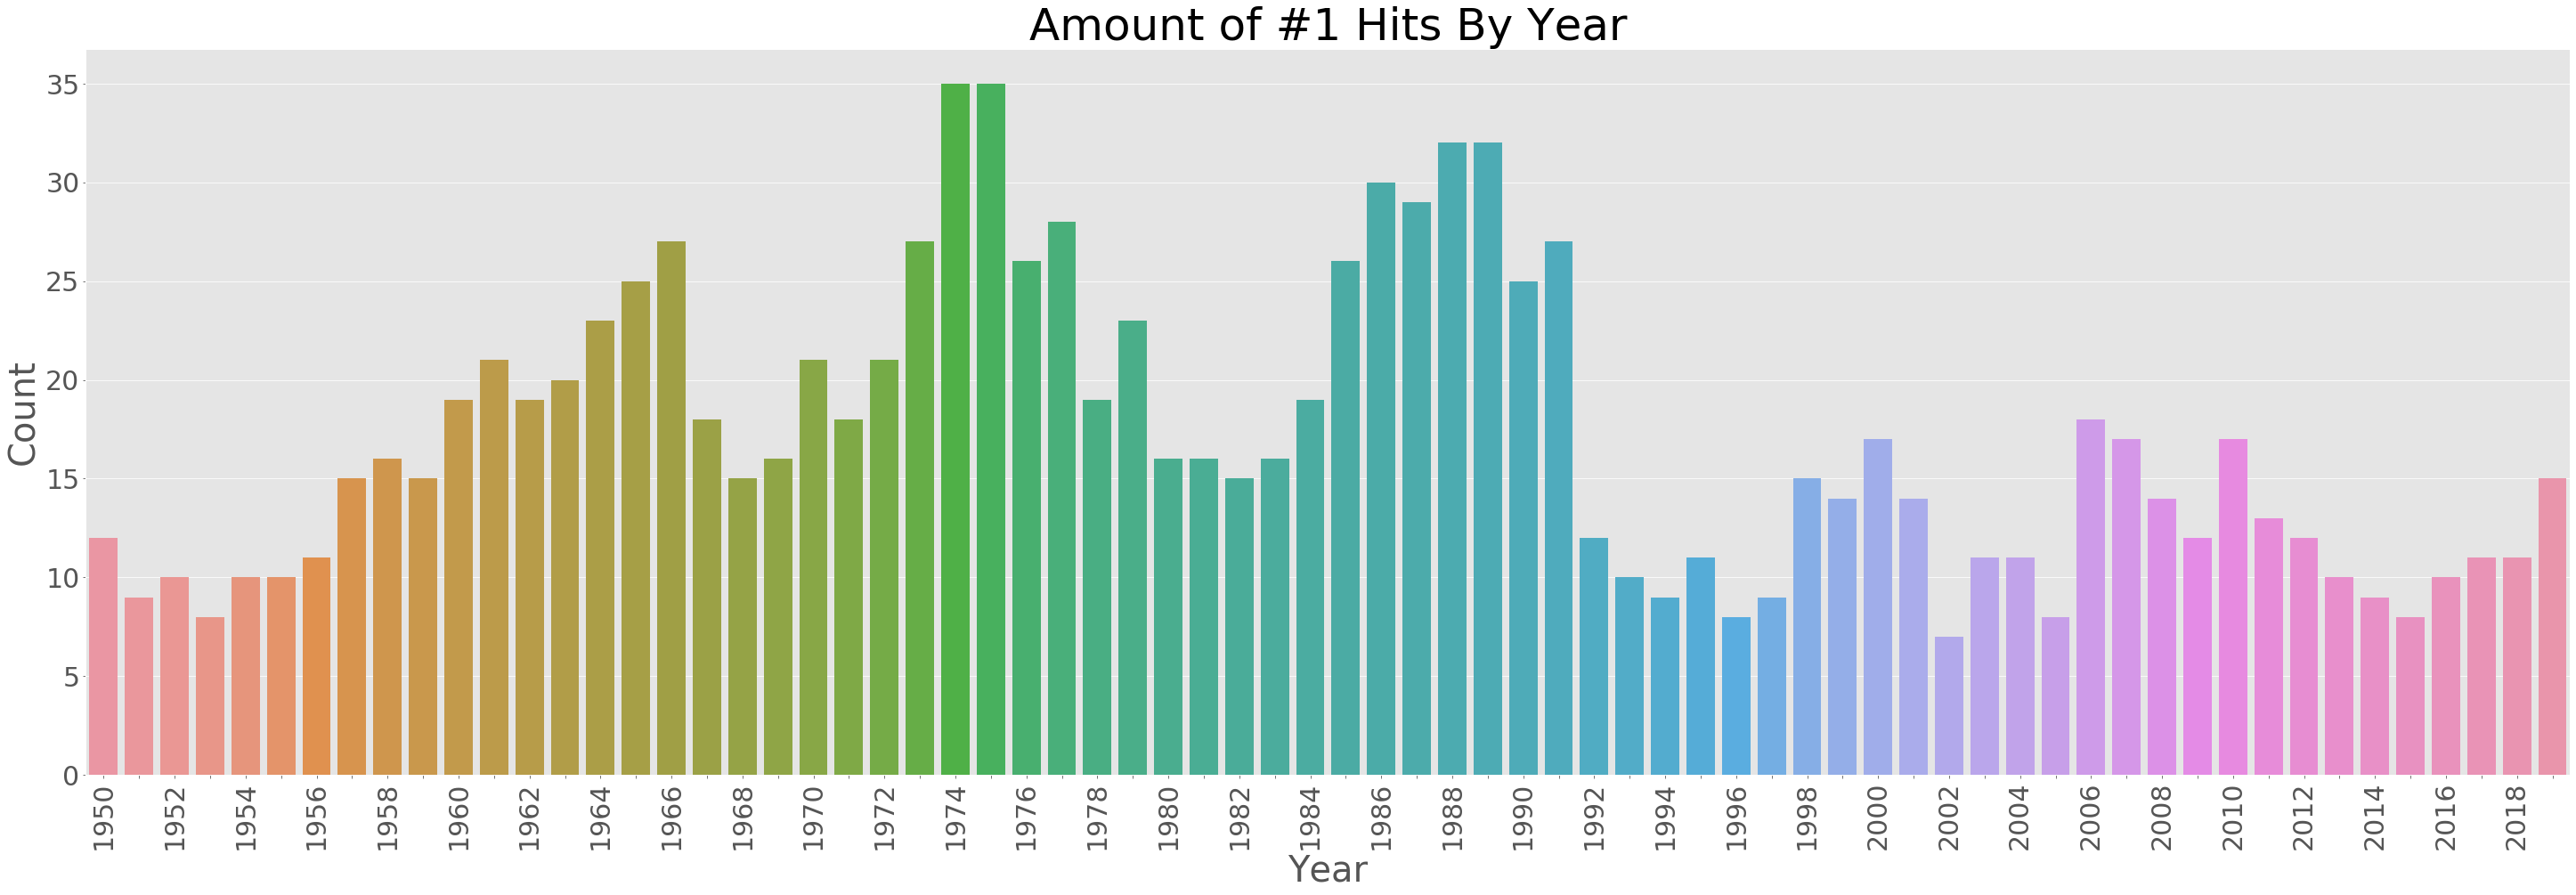

In [4]:
fig, ax = plt.subplots(figsize=(50,15))
sns.countplot(x='year', data=songs)

e = 2
for n,label in enumerate(ax.xaxis.get_ticklabels()):
    if n%e !=0:
        label.set_visible(False)

plt.xlabel('Year', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.title("Amount of #1 Hits By Year", fontsize=50)
plt.show()

This is actually very interesting! We see 3 major peaks in the amount of number ones per year. The first peak in the mid 60s, the mid 70s, and a persistent peak that started in the mid 80s and lasted through the early 90s. There are some smaller peaks from 1998-2001 and 2006-2010. After 2010, we can see a return to early 1950s numbers.

### Who has had the most number one hits since 1950?

I'll look at the top 10 acts with the most number one hits. I'll refer to these acts as __top hit makers__ from here on out.

In [5]:
songs['artist_name'].value_counts()[:12]

The Beatles        20
Mariah Carey       19
Elvis Presley      17
Michael Jackson    12
Madonna            12
Rihanna            11
Whitney Houston    11
Janet Jackson      10
The Supremes       10
Katy Perry          9
Usher               9
Bee Gees            9
Name: artist_name, dtype: int64

__Note:__
I've included the top 12 since the Bee Gees, Katy Perry, and Usher are tied with 9 hits.

The Beatles have had the most number one hits, while Mariah Carey trails them by just one song, and Elvis by 3. A quick Google search verifies this finding.

Looking closer at these __top hit makers__, 58.3% of them are female and 41.6% are male. Three of these acts are groups/ensembles, the rest are solo acts.

Off the top of my head, I know The Beatles were active in the 60s but broke up in the 70s. Another quick search tells me that The Beatles were actually together for 8 years. Mariah Carey has been making music since the 90s. I want to take a closer look at this.

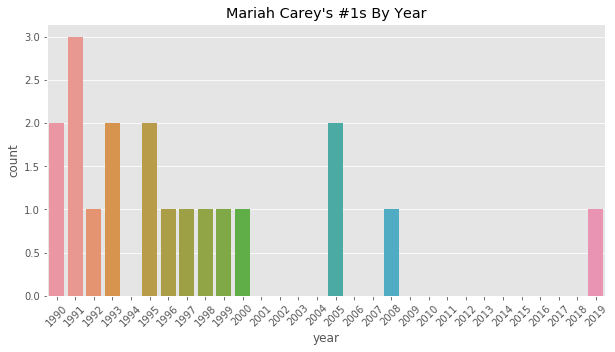

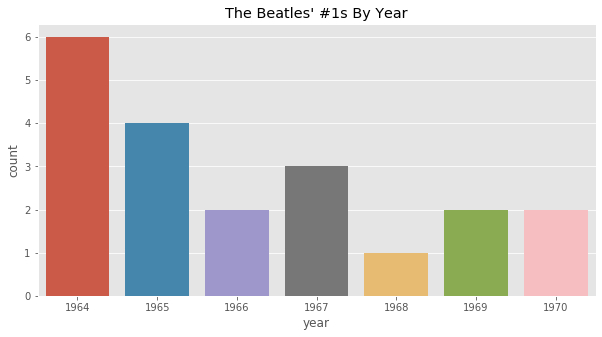

In [51]:
# Mariah Carey's data
fig, ax = plt.subplots(figsize=(10,5))
data = songs[songs['artist_name'] == "Mariah Carey"]['year']
sns.countplot(data, order=labels)

labels = list(range(data.values.min(),data.values.max()+1))
plt.xticks(rotation=45)
plt.title("Mariah Carey's #1s By Year")
plt.show()

# The Beatles' data
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(songs[songs['artist_name'] == "The Beatles"]['year'])

plt.title("The Beatles' #1s By Year")
plt.show()

The above plot shows that The Beatles have had at least one hit from 1964-70 (in the US). Mariah Carey had a majority of her number ones between 1990 and 2000, with her four most recent number ones in and after 2005. So, it has taken Mariah Carey an extra two decades to come close to The Beatles' record as __top hit maker__, given that we ignore other factors that may be at play as seen in _Amount of #1 Hits By Year_ plot.

I wonder how long it has taken the other __top hit makers__ to accumulate the number of hits they made to get them into the list of __top hit makers__.

### How long did it take each artist to become a Top Hit Maker? How many decades do their hits span?
First I'll look at how many decades each artist's hits span.

In [7]:
top_12_artists = list(songs['artist_name'].value_counts()[:12].index)

for artist in top_12_artists:
    num_hits = len(songs[songs['artist_name'] == artist])
    decades = songs[songs['artist_name'] == artist]['decade'].unique()
    l = len(decades)
    
    print(f"{artist} had {num_hits} number ones throughout {l} decade(s), including: {decades} \n")

The Beatles had 20 number ones throughout 2 decade(s), including: [1960 1970] 

Mariah Carey had 19 number ones throughout 3 decade(s), including: [1990 2000 2010] 

Elvis Presley had 17 number ones throughout 2 decade(s), including: [1950 1960] 

Michael Jackson had 12 number ones throughout 3 decade(s), including: [1970 1980 1990] 

Madonna had 12 number ones throughout 3 decade(s), including: [1980 1990 2000] 

Rihanna had 11 number ones throughout 2 decade(s), including: [2000 2010] 

Whitney Houston had 11 number ones throughout 2 decade(s), including: [1980 1990] 

Janet Jackson had 10 number ones throughout 3 decade(s), including: [1980 1990 2000] 

The Supremes had 10 number ones throughout 1 decade(s), including: [1960] 

Katy Perry had 9 number ones throughout 2 decade(s), including: [2000 2010] 

Usher had 9 number ones throughout 3 decade(s), including: [1990 2000 2010] 

Bee Gees had 9 number ones throughout 1 decade(s), including: [1970] 



The average __top hit maker__ has hits that span at least two decades. I'll take a closer look at the year by year distribution of each artist's hits, including years they didn't have songs that reached number one. This will tell me how long it took each artist to become a __top hit maker__.

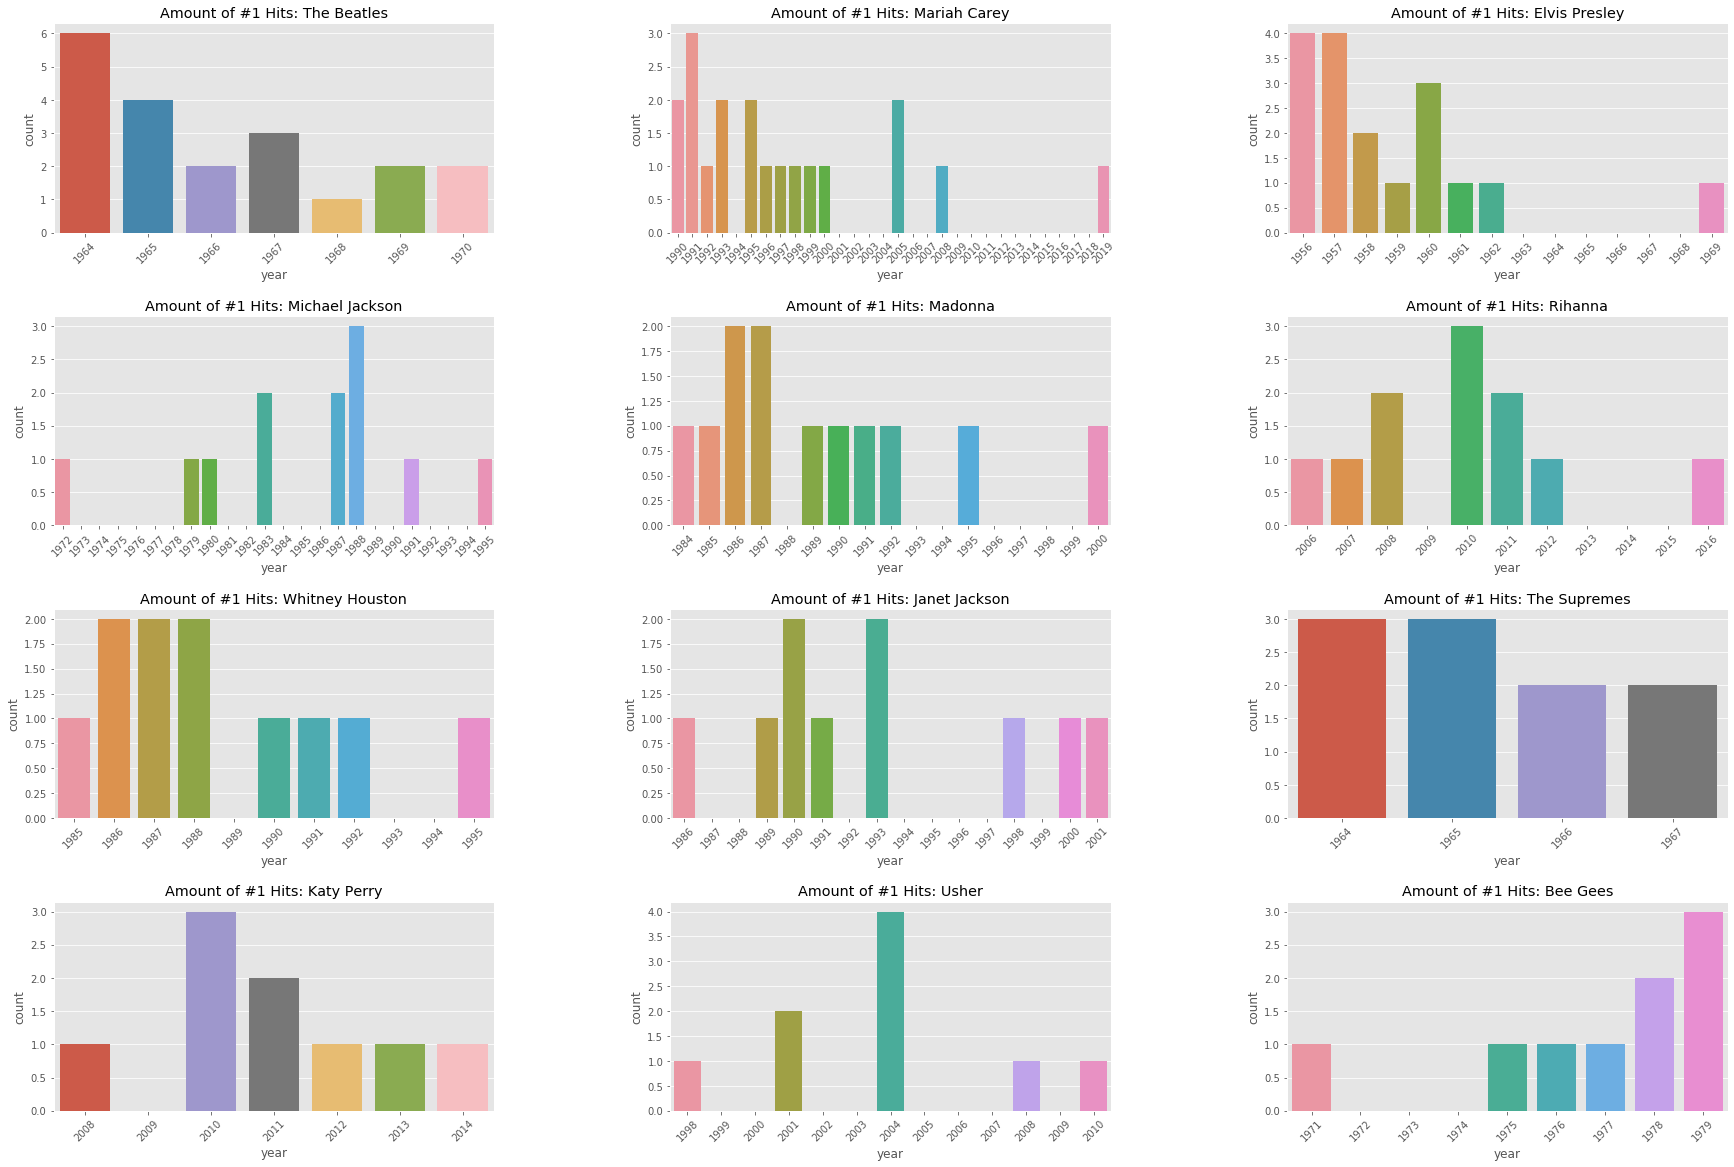

In [26]:
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    artist = top_12_artists[i-1]

    data = songs[songs['artist_name'] == artist]['year']
    labels = list(range(data.values.min(),data.values.max()+1))
    ax.set_title(f"Amount of #1 Hits: {artist}")
    ax.set_xticklabels(labels, rotation=45)
    sns.countplot(data, order=labels )

From these plots, I can tell a few things. One being each artist's most productive years, as shown by the year(s) they had multiple number one hits. I'm tempted to label these productive years as __the year each artist peaked in their careers__. However, __music is subjective__, and in my opinion, having several number one hits does not indicate music quality or maturity of an artist. I'll refer to these peaks as each artist's __peak commercial success__.

I'll use Kesha as an example:

In [29]:
for i, row in songs[songs['artist_name'] == "Kesha"].iterrows():
    print(f" '{row['track_name']}', {row['artist_name']}, {row['year']}")

 'TiK ToK', Kesha, 2010
 'We R Who We R', Kesha, 2010


Kesha has had 2 number one's as a lead artist, and was a featured artist on two other songs that went #1 in 2009 and 2014. If we were to use most productive years as an indicator of peak career, we would say Kesha peaked in 2010. However, her third studio album, _Rainbow_ went number one in the US in 2017, seven years after her supposed "peak". I'll note though that none of the songs from _Rainbow_ went number one, despite being her highest rated album according to Metacritic. Additionally, her second album, _Cannibal_ , did not reach number one despite containing her second number one hit, "We R Who We R". So we can classify 2010 as the year Kesha reached her __commercial peak__ but not her artistic peak.

It's interesting to note from the above plots, the amount of time it took each artist to accumulate enough hits to make them a __top hit maker__.

The Supremes managed to get 10 number one hits in a span of 4 years, the shortest career of the top hit makers. The Supremes are tied with Janet Jackson for the 6th spot in the list of __top hit makers__. Janet Jackson also has 10 number one hits, but accumulated them over 16 years, an extra 12 years than it took The Supremes.

However, there are a lot of factors at play here. An artist's personal life, band/group dynamics, desires of music executives, and the competitiveness of the music industry, to name the most obvious ones. 

For instance, we see that __top hit makers__ from the 1960s, The Beatles and The Supremes, had relatively short careers compared with more modern acts after the 70s. They also tended to have number one hits every year following their first US number one until eventually breaking up. 
Elvis is the exception, having number one hits throughout the 1950s, which make his career much longer. Elvis also experienced a lack of number one hits after 1962, until his comeback in 1969. This gap in number one hits can be attributed to Elvis's manager pushing him into making films after returning from military service in 1960. His post-1962 films ultimately hurt his career and reputation as a serious musician. Elvis's 1969 hit, "Suspicious Minds", marked his comeback but was the last song that would reach number one.

Upon looking at the other __top hit makers__, we see similar gaps where there are years an artist had no number one hits. Interestingly, Mariah Carey has the longest gap between number one hits; there are 11 years between 2008's "Touch My Body" and her 1994 hit "All I Want for Christmas Is You" going number one in 2019.

### Is there any commonalities between songs that went number one such as a high valence or tempo?

Now I'll take a step back from looking into artists individually and look at song features. First I'll look at how each feature in the whole dataset in distributed before filtering by decade.

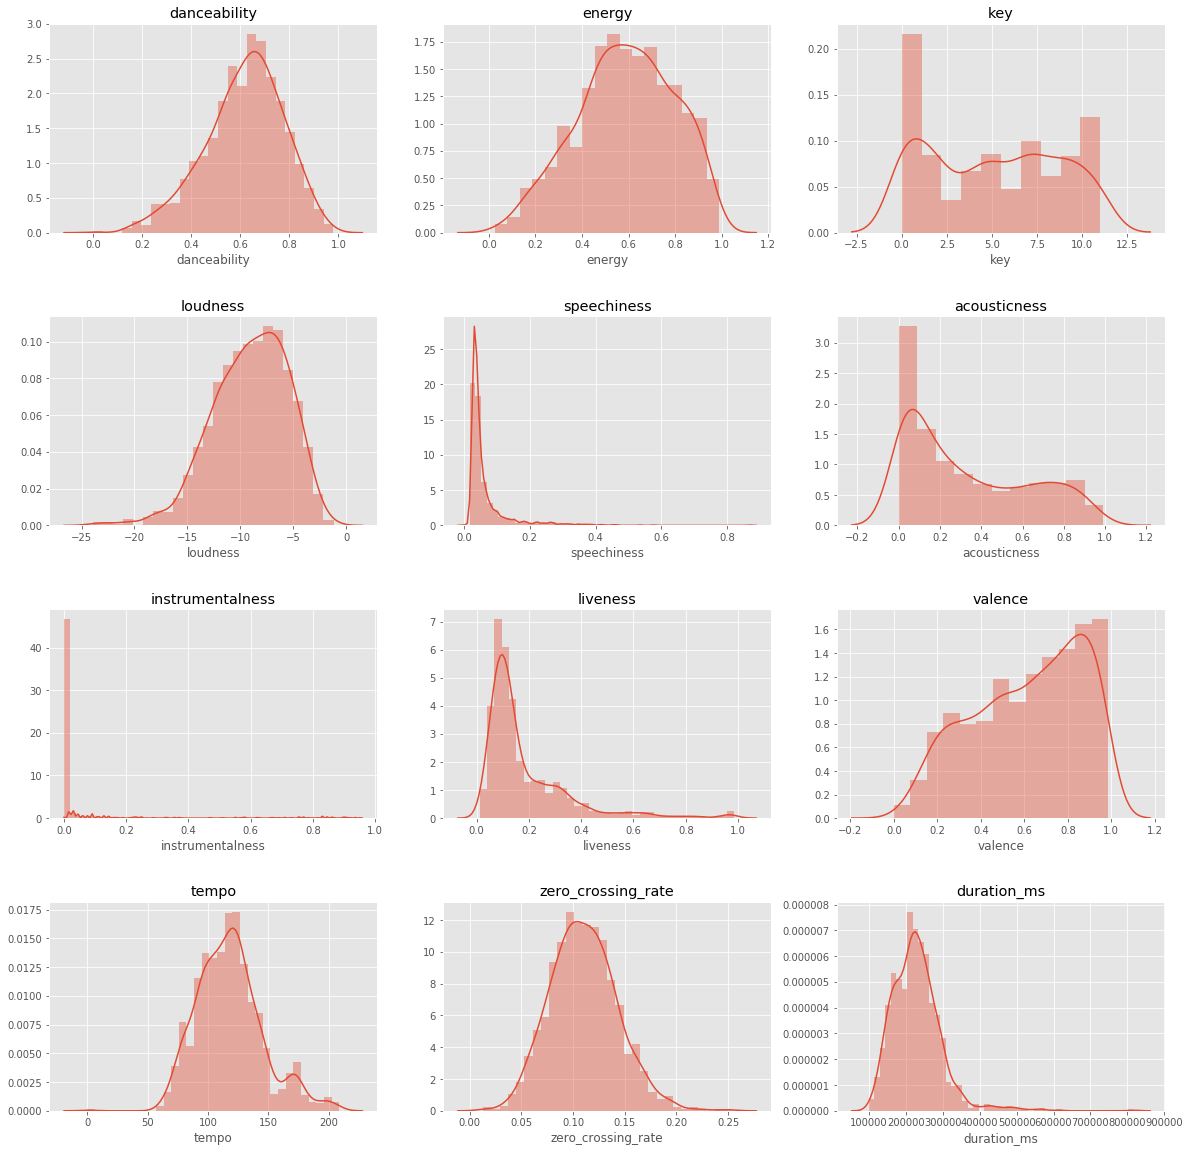

In [15]:
cols = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'zero_crossing_rate', 'duration_ms']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    sns.distplot(songs[cols[i-1]])
    ax.set_title(cols[i-1])

Danceability, energy, loudness, and tempo all appear to be slightly left skewed. Speechiness, instrumentalness, liveness, and duration are all heavily right-skewed, but this is to be expected based on what these features represent. Valence and acousticness are most interesting in my opinion. I expected acousticness to be distributed similarly to instrumentalness, but it doesn't seem to be as skewed. Valence also has an interesting distribution. I expected the distribution to be left-skewed, since valence here means how positive or happy a song sounds, and hit songs tend to be pretty upbeat unless they're ballads. However, I expected this distribution to resemble the danceability distribution, centered around 0.7-0.9.

Before I move on, I'll generate a correlation heatmap of the features to get a better idea of how these features are related, if at all.

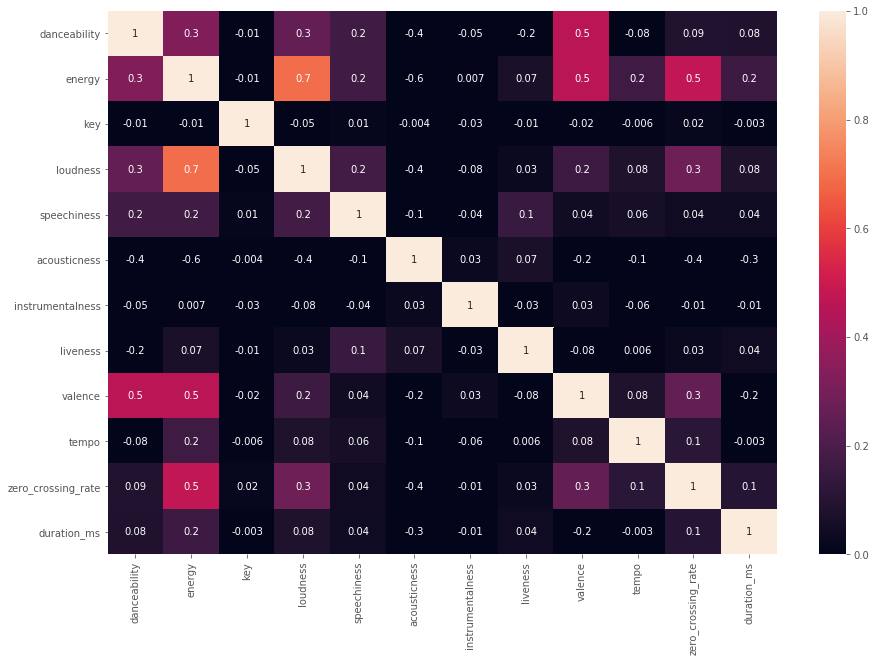

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
corr = songs[cols].corr()
sns.heatmap(corr, annot=True, fmt='.1g',vmin=0, vmax=1)
plt.show()

The most important insights I get from this plot is that danceability is correlated with valence, which makes sense. A song that's danceable would most likely song very upbeat and happy. Energy and loudness is also moderately correlated with danceability; they are also highly correlated to each other.

Now I'll group the songs by decade and plot the mean values of each feature to get an idea of how each of these features changed by decade. 

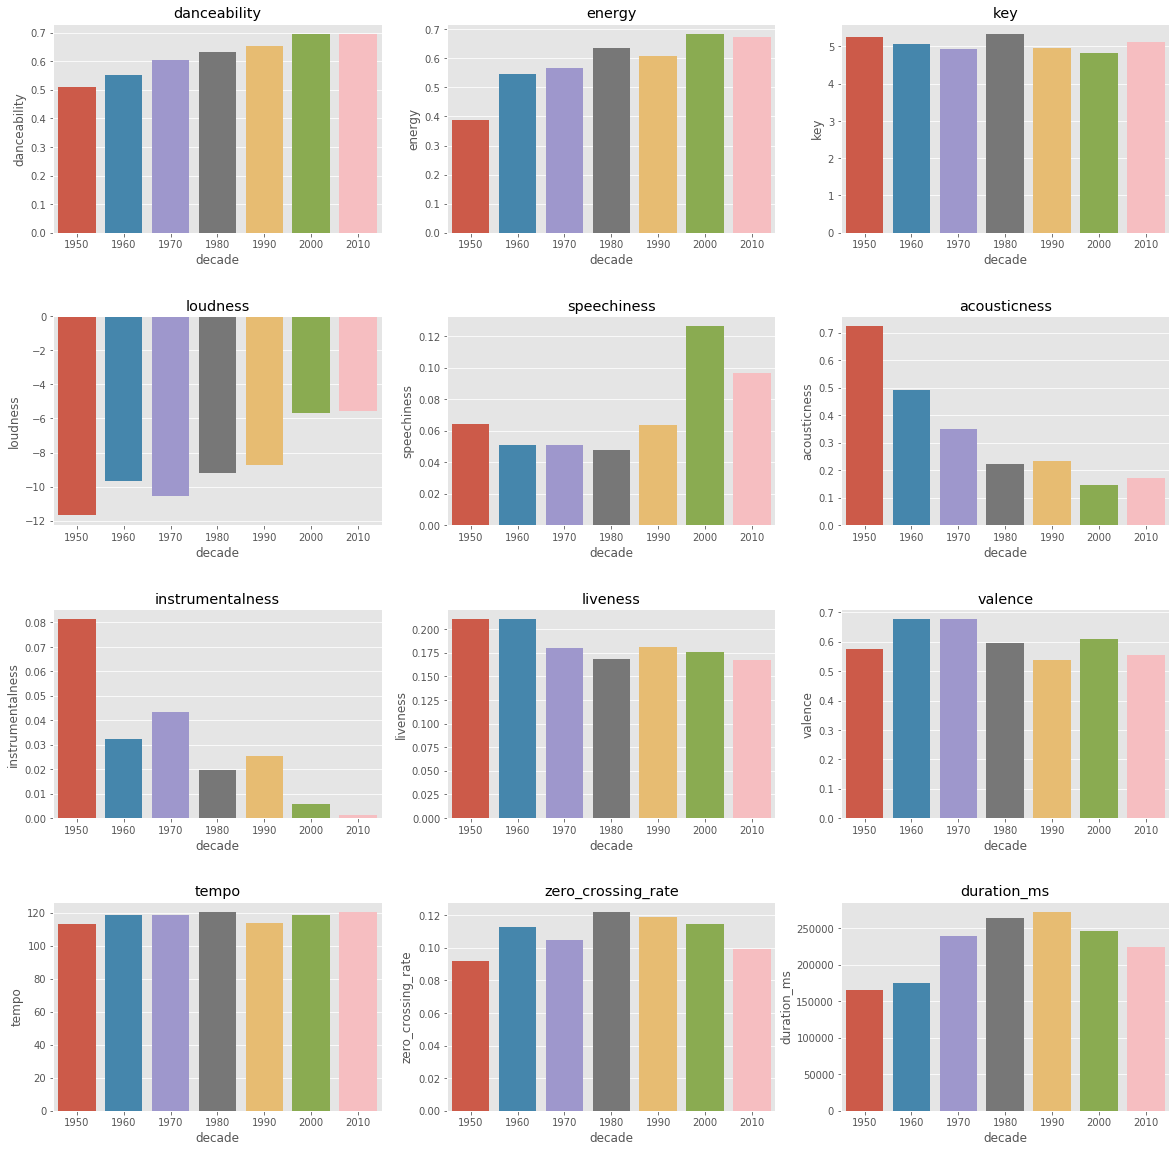

In [32]:
decade_grouped = songs.groupby(['decade']).mean().reset_index()

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    sns.barplot(x='decade', y=cols[i-1], data=decade_grouped)
    ax.set_title(cols[i-1])

There are a lot of interesting trends here. Typically, number one hits have a `danceabilty` score above 0.5. There's been a slight increasing trend since the 1950s of songs becoming more danceable as the decades have gone on. We see a similar trend with `energy`. 

Songs in the 1950s were generally low `energy`, highly `instrumental`, and highly `acoustic`, at least before 1955 when the first rock and roll song went number one, "Rock Around The Clock". Several artists of the early 1950s were accompanied by orchestras, some songs were even solely instrumental. The latter half of the decade sees the rise of doo-wop, an early genre of R&B, which was more vocal and incorporated little to no instrumentals. Doo-wop as a genre typically characterizes the musical style of this decade.

Another interesting trend is the dramatic increase of `speechiness` in the 2000s compared to the 1990s. I imagine this can be attributed to the rising popularity of rap/hip-hop songs in the 90s, then the explosion of these two genres in the 2000s.

`Tempo` appears pretty steady throughout the decades, which is interesting because I would expect songs to become faster. `Valence` stays around the same levels as well. Looking at song `duration`, I see that songs in the 1950s were much shorter, with songs getting progressively longer through the 90s, and eventually decreaseing again.

`Loudness` appears to become less negative, which I imagine means songs are getting louder as time goes on. This makes sense since `loudness` was highly correlated with `energy`, which also increases with the decades.

Just out of curiosity, I'll plot the yearly mean for each feature.

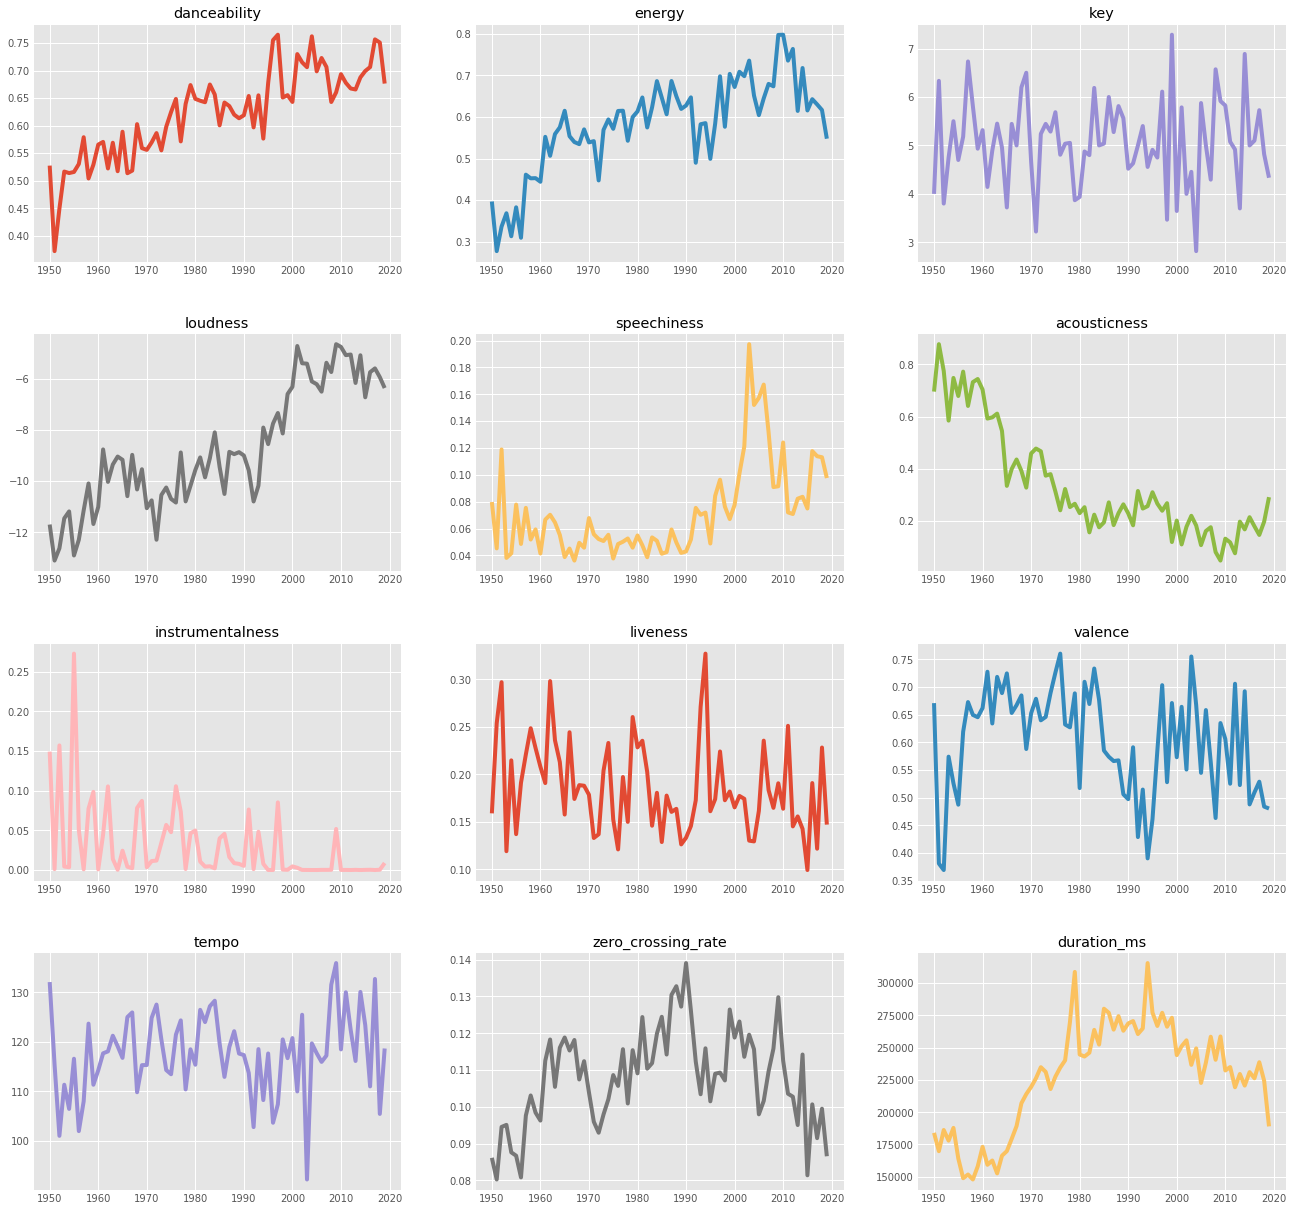

In [126]:
year_grouped = songs.groupby(['year']).mean().reset_index()
plt.style.use('ggplot')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors.extend(colors)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i,c in zip(range(1, 13), colors):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    plt.plot(year_grouped['year'], year_grouped[cols[i-1]], color=c)
    ax.set_title(cols[i-1])

These plots verify several of the patterns seen in the decadal plots. I can also see some of the more fine-grained patterns here, especially in the valence plot. In the decadal plots, `valence` looked fairly uniform throughout the decades, but here we can see several drops in the mean `valence` in the early 50s, and then again in the mid 80s until the mid 90s.

### Are genres consistent across genres?
Answering this question is going to be tricky, especially since the older songs may be labeled as "standards" or "oldies".

In [137]:
for decade in songs['decade'].unique():
    df = songs[songs['decade'] == decade]
    print(decade)
    print(df['genres'].value_counts()[:5])
    print("\n")  

1950
pop                                                              13
['rock-and-roll', 'rockabilly']                                  12
['adult standards', 'easy listening', 'lounge', 'vocal jazz']     5
vocal                                                             5
country                                                           5
Name: genres, dtype: int64


1960
rock                                                                                                       35
r&b/soul                                                                                                   23
pop                                                                                                        21
['rock-and-roll', 'rockabilly']                                                                             6
['adult standards', 'brill building pop', 'bubblegum pop', 'easy listening', 'lounge', 'rock-and-roll']     4
Name: genres, dtype: int64


1970
pop           40
r&b/soul      30
roc

In [169]:
songs[(songs['decade'] == 1990) & (songs['genres'] == "pop")]
# songs[songs['genres'] == "['dance pop', 'pop', 'r&b', 'urban contemporary']"]

,track_id,decade,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,zero_crossing_rate,duration_ms,time_signature,genres,year
816,0gLQ6jhJsyYfl7PrD1RZ7X,1990,Vision of Love,Mariah Carey,0.256,0.464,5,-10.959,1,0.0382,0.43300,0.000000,0.1210,0.355,205.362,0.150702,209293,3,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1990
826,48l7PNpT2fBoT4cdLW6EzP,1990,Love Takes Time,Mariah Carey,0.403,0.338,8,-12.371,0,0.0322,0.72700,0.000000,0.0849,0.233,126.230,0.122944,229227,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1990
834,3zWopeZAW7NNIgP7ryuemU,1990,"Someday - New 12"" Jackswing",Mariah Carey,0.820,0.740,1,-7.583,0,0.1170,0.00365,0.004090,0.0131,0.620,110.032,0.149714,418134,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1991
842,1hFtJ5rV3aAm58ErijHdFO,1990,I Don't Wanna Cry,Mariah Carey,0.641,0.504,7,-12.486,1,0.0310,0.19700,0.000096,0.2880,0.275,130.786,0.123692,288827,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1991
850,4nWZS2XBdv9chtq2bjo1I8,1990,Emotions - Special Motion Edit,Mariah Carey,0.672,0.893,4,-6.262,0,0.0364,0.01380,0.044500,0.0461,0.683,114.644,0.198196,289126,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1991
862,2exGHTlYAUQ5UX4e7Uqc79,1990,I'll Be There (feat. Trey Lorenz) - Live at MT...,Mariah Carey,0.404,0.498,5,-9.855,1,0.0338,0.68700,0.000000,0.7250,0.284,81.951,0.094727,282373,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1992
874,6HcQZfMrw3KwGyzrKw1Pjy,1990,Dreamlover,Mariah Carey,0.701,0.705,5,-6.180,1,0.0357,0.18000,0.000000,0.1410,0.710,100.669,0.137875,232960,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1993
877,4inleGAcERnVbxF1Fwexy6,1990,"Hero - Live at Live 8, Hyde Park, London, 2nd ...",Mariah Carey,0.598,0.437,8,-9.859,1,0.0371,0.35100,0.000000,0.9760,0.282,119.880,0.117245,272291,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1993
895,7vALSxOYKr0Z3rrATvvb9d,1990,Fantasy (feat. O.D.B.),Mariah Carey,0.839,0.617,2,-7.528,1,0.0997,0.04120,0.000000,0.0397,0.805,102.495,0.138720,292880,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1995
897,7ySbfLwdCwl1EM0zNCJZ38,1990,One Sweet Day,Mariah Carey,0.569,0.495,1,-8.964,1,0.0300,0.35300,0.000000,0.0839,0.302,128.228,0.122573,281067,4,"['dance pop', 'pop', 'r&b', 'urban contemporary']",1995


Luckily this wasn't as precarious as I thought it would be. I'll be largely ingoring __pop__ as a genre, since it refers to what is popular, rather than a specific sound.

#### 1950s
The 1950s was characterized by rock and roll, which became very popular during this decade. I see a genre referred to as __easy listening__. A quick search tells me that easy listening music is the type of music that preceded rock and roll, is melodic, accompanied by string instruments.

From Wikipedia:
>Easy listening music featured popular vocalists such as Perry Como, Frank Sinatra, Bing Crosby, Dean Martin, Tony Bennett, Dionne Warwick, Bill Kenny, Astrud Gilberto, Matt Monro, The Carpenters and many others.

[Source](https://en.wikipedia.org/wiki/Easy_listening)

This makes sense considering what I saw in the feature distributions. The genres __vocal__ and __country__ also make sense for this era of music.

#### 1960s
In this decade we can see that __rock__ and __r&b/soul__ overtook pop as the most popular genre. We see the beginnings of rock with the introduction of The Beatles, The Beach Boys, The Rolling Stones, and The Mamas & The Papas. The rise of r&b can be attributed with the wildly successful artists and groups coming from __Motown__.

#### 1970s
With the 70s, pop music begins to encompass several genres and acts from artists of the previous decades. In the 70s, George Harrison, Marvin Gaye, Linda Ronstadt, and several __disco__ artists make up the pop genre. In this decade we also see the introduction of disco, and an explosion of rock music influenced by the rock artists of the decade prior. The Motown acts also start incorporating more disco elements into their genre and make, in my opinion, some of the most influential music of all time.

#### 1980s
In the 1980s, we see the end of disco and a decline in r&b. In my opinion, I would characterize the 80s and rock's second wave. This decade launches the careers of several more modern artists that would go on to still be making music today, 40 years later. We see the launch of Michael Jackson's solo career. __Dance pop__ also becomes very popular in this decade with the popularization with a more electronic sound. The 80s also gifts us with some great one-hit-wonders such as "Come On Eileen", "Africa" and "Hey Mickey".

#### 1990s
Dance pop continues into the 90s